In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
m = np.array([[0, 0]])
P = np.array([[1, 0], [0, 1]])
states = np.random.multivariate_normal(m[0], P, 10)

In [76]:
def c(state):
    return np.linalg.norm(state) - 1

In [77]:
from scipy.optimize import minimize

new_states = np.zeros_like(states)

for i, state in enumerate(states):
    if c(state) > 0:
        opt = minimize(lambda x: x @ np.linalg.inv(P) @ x.T, state, method='SLSQP', constraints={'fun': c, 'type': 'ineq'})
        new_states[i] = opt.x
    else:
        new_states[i] = state

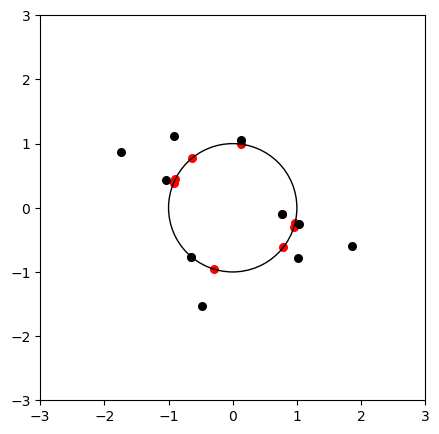

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Plot circle with radius 1
circle = plt.Circle((0, 0), 1, color='k', fill=False)
ax.add_artist(circle)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')

# Plot points
ax.scatter(new_states[:, 0], new_states[:, 1], color='r', s = 30)
ax.scatter(states[:, 0], states[:, 1], color='k', s=30)


plt.show()